Load the Titanic dataset (available in seaborn) into a pandas DataFrame

In [ ]:
##Load the Titanic dataset (available in seaborn) into a pandas DataFrame**

In [ ]:
import pandas as pd
import seaborn as sns

titanic_df=sns.load_dataset('titanic')

In [ ]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Find the average age of passengers for each class (1st, 2nd, and 3rd).


In [ ]:
#Calculate the average age of passenger for each class
average_age_by_class = titanic_df.groupby('pclass')['age'].mean()

print("Average age of passenger for each class:")
print(average_age_by_class)

Average age of passenger for each class:
pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64


Create a new DataFrame that contains the count of male and female passengers in each age group (e.g., 0-10, 11-20, etc.).


In [ ]:
age_groups = pd.cut(titanic_df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100])
passenger_count_by_age_group = titanic_df.groupby(['sex', age_groups]).size().unstack(fill_value=0)

In [ ]:
print("DataFrame with count of male and female passengers in each age group: ", passenger_count_by_age_group)

DataFrame with count of male and female passengers in each age group:  age     (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
sex                                                                           
female       31        46        81        55        31        14         3   
male         33        69       149       100        55        28        14   

age     (70, 80]  (80, 100]  
sex                          
female         0          0  
male           5          0  


Find the name and ticket number of the passenger(s) who paid the highest fare and survived the disaster.


In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Filter the dataset for passengers who survived
survived_df = titanic_df[titanic_df['survived'] == 1]

# Find the highest fare paid by survivors
max_fare = survived_df['fare'].max()

# Find the passenger(s) who paid the highest fare
highest_fare_passengers = survived_df[survived_df['fare'] == max_fare]

# Display the information of these passengers
print("Passenger(s) who paid the highest fare and survived:")
print(highest_fare_passengers)


Passenger(s) who paid the highest fare and survived:
     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
258         1       1  female  35.0      0      0  512.3292        C  First   
679         1       1    male  36.0      0      1  512.3292        C  First   
737         1       1    male  35.0      0      0  512.3292        C  First   

       who  adult_male deck embark_town alive  alone  
258  woman       False  NaN   Cherbourg   yes   True  
679    man        True    B   Cherbourg   yes  False  
737    man        True    B   Cherbourg   yes   True  


In [ ]:
[survived_df]

[     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
 1           1       1  female  38.0      1      0  71.2833        C   First   
 2           1       3  female  26.0      0      0   7.9250        S   Third   
 3           1       1  female  35.0      1      0  53.1000        S   First   
 8           1       3  female  27.0      0      2  11.1333        S   Third   
 9           1       2  female  14.0      1      0  30.0708        C  Second   
 ..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
 875         1       3  female  15.0      0      0   7.2250        C   Third   
 879         1       1  female  56.0      0      1  83.1583        C   First   
 880         1       2  female  25.0      0      1  26.0000        S  Second   
 887         1       1  female  19.0      0      0  30.0000        S   First   
 889         1       1    male  26.0      0      0  30.0000        C   First   
 
        who  adult_male deck  embark_t

In [ ]:
max_fare

512.3292

Calculate the survival rate for passengers who were traveling alone (without any siblings, spouses, parents, or children) versus those who were traveling with family members.


In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Define passengers traveling alone as those with no siblings/spouses and no parents/children
titanic_df['traveling_alone'] = (titanic_df['sibsp'] == 0) & (titanic_df['parch'] == 0)

# Calculate survival rates
survival_rate_alone = titanic_df[titanic_df['traveling_alone'] == True]['survived'].mean()
survival_rate_with_family = titanic_df[titanic_df['traveling_alone'] == False]['survived'].mean()

print(f"Survival rate for passengers traveling alone: {survival_rate_alone:.2f}")
print(f"Survival rate for passengers traveling with family: {survival_rate_with_family:.2f}")


Survival rate for passengers traveling alone: 0.30
Survival rate for passengers traveling with family: 0.51


For each passenger, calculate the age difference with the oldest sibling (if any) and the age difference with the youngest sibling (if any).


In [26]:
import pandas as pd

# Load the Titanic dataset (assuming you've already loaded it)
# titanic_df = pd.read_csv('titanic.csv')

# Assuming you have a 'SibSp' column representing the number of siblings/spouses aboard
# and an 'Age' column representing the passenger's age

# Calculate the maximum age difference with the oldest sibling
titanic_df['max_sibling_age_diff'] = titanic_df.groupby('SibSp')['Age'].transform(lambda x: x.max() - x.min())

# Calculate the minimum age difference with the youngest sibling
titanic_df['min_sibling_age_diff'] = titanic_df.groupby('SibSp')['Age'].transform(lambda x: x.min() - x.max())

# Display the results
result_df = titanic_df[['PassengerId', 'max_sibling_age_diff', 'min_sibling_age_diff']]
print(result_df)


KeyError: 'SibSp'

Find the most common deck letter (A, B, C, etc.) for each passenger class.


In [28]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Extract the deck letter from the cabin number
df['deck'] = df['deck'].dropna().apply(lambda x: str(x)[0].upper())

# Group by passenger class and find the most common deck letter
most_common_decks = df.groupby('pclass')['deck'].agg(lambda x: x.value_counts().index[0])

print(most_common_decks)


pclass
1    C
2    F
3    F
Name: deck, dtype: object


Group the Titanic DataFrame by 'Embarked' (port of embarkation) and find the percentage of passengers who survived in each group.

In [29]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Group by 'Embarked' and calculate the percentage of passengers who survived in each group
survival_rate_by_embarked = df.groupby('embarked')['survived'].mean() * 100

print(survival_rate_by_embarked)


embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


Calculate the correlation matrix for the 'Age', 'Fare', and 'Survived' columns in the Titanic dataset and find the feature with the highest absolute correlation with 'Survived'.


In [30]:
# Select the relevant columns
columns_of_interest = ['age', 'fare', 'survived']
df_subset = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Find the feature with the highest absolute correlation with 'Survived'
abs_correlation_with_survived = correlation_matrix['survived'].abs().drop('survived')
highest_correlation_feature = abs_correlation_with_survived.idxmax()

print("Correlation matrix:\n", correlation_matrix)
print("\nFeature with the highest absolute correlation with 'Survived':", highest_correlation_feature)

Correlation matrix:
                age      fare  survived
age       1.000000  0.096067 -0.077221
fare      0.096067  1.000000  0.257307
survived -0.077221  0.257307  1.000000

Feature with the highest absolute correlation with 'Survived': fare


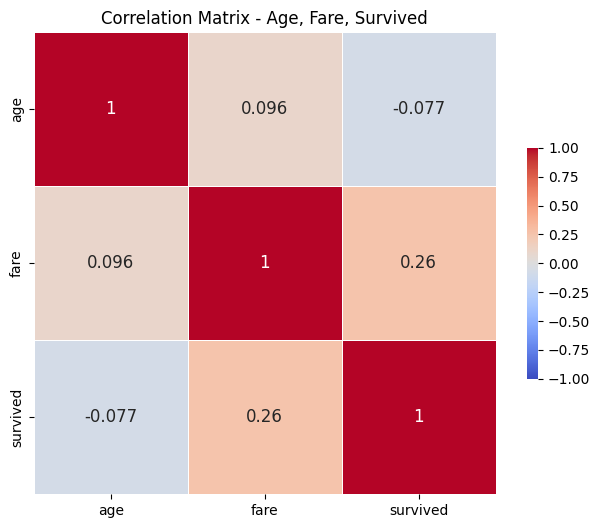


Feature with the highest absolute correlation with 'Survived': fare


In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Select the relevant columns
columns_of_interest = ['age', 'fare', 'survived']
df_subset = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"fontsize": 12})
plt.title('Correlation Matrix - Age, Fare, Survived')
plt.show()

# Find the feature with the highest absolute correlation with 'Survived'
abs_correlation_with_survived = correlation_matrix['survived'].abs().drop('survived')
highest_correlation_feature = abs_correlation_with_survived.idxmax()

print("\nFeature with the highest absolute correlation with 'Survived':", highest_correlation_feature)


Create a new DataFrame that contains the 'Pclass', 'Sex', 'Age', and 'Fare' columns from the Titanic dataset and pivot it to have 'Pclass' as the index, 'Sex' as the columns, and 'Fare' as the values, with 'Age' as the weights.


In [33]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Select the columns of interest
columns_of_interest = ['pclass', 'sex', 'age', 'fare']
df_subset = df[columns_of_interest]

# Pivot the DataFrame
pivoted_df = pd.pivot_table(df_subset, index='pclass', columns='sex', values='fare', aggfunc='mean', fill_value=0, margins=True, margins_name='Total')

print(pivoted_df)


sex         female       male      Total
pclass                                  
1       106.125798  67.226127  84.154687
2        21.970121  19.741782  20.662183
3        16.118810  12.661633  13.675550
Total    44.479818  25.523893  32.204208


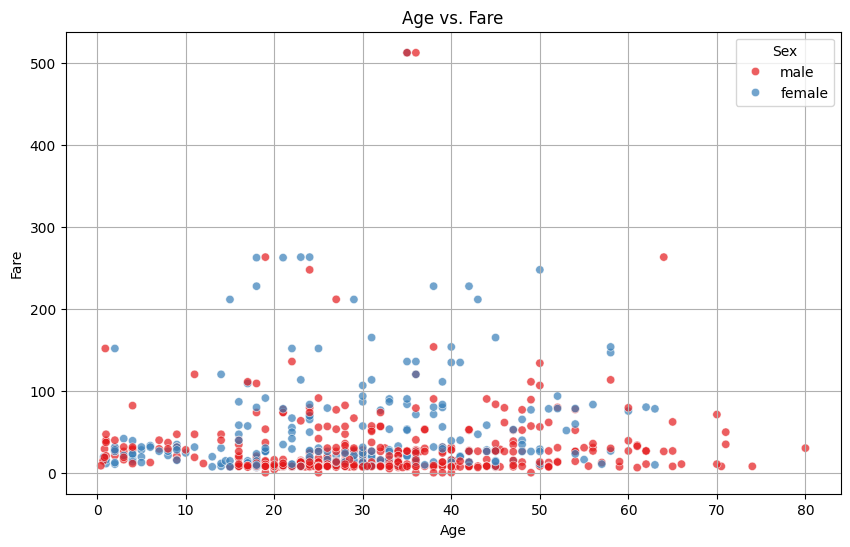

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Plot Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='sex', palette='Set1', alpha=0.7)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Sex')
plt.grid(True)
plt.show()
